In [13]:
from fortunes import *
from random import uniform
from visualizer.main import Visualizer
from delaunay import *

In [14]:
# editable

def gen_points(number_of_points):
    list = []
    for _ in range(number_of_points):
        list.append(Point(uniform(0,100),uniform(0,100)))
    return list

points = gen_points(number_of_points=10) # tutaj zmień liczbę punktów


Triangulacja Delaunay oraz Diagram Woronoja wyznaczony za pomocą algorytmu Bowyera-Watsona (algorytm iteracyjny)

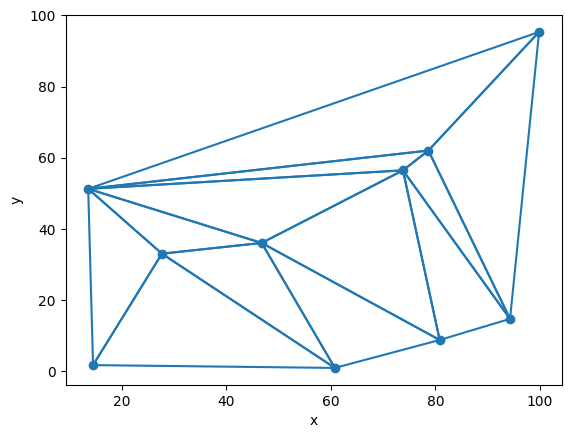

In [17]:
# triangulacja Delaunay

delaunay = DelaunayTriangulation(points)
triangulation = delaunay.run()

vis = Visualizer()
vis.add_point([p.get() for p in points])
for triangle in triangulation:
    for edge in triangle.edges:
        vis.add_line_segment((edge.p1.get(), edge.p2.get()))

vis.show()

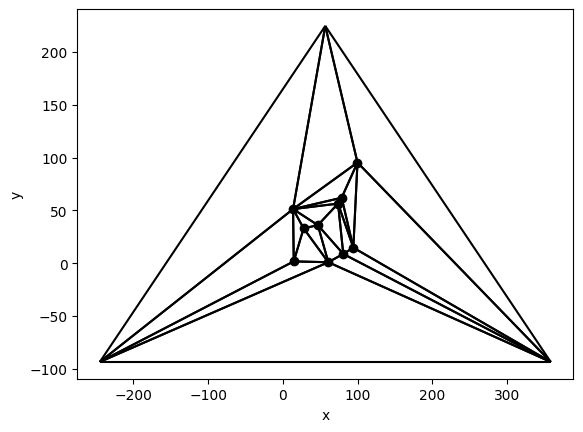

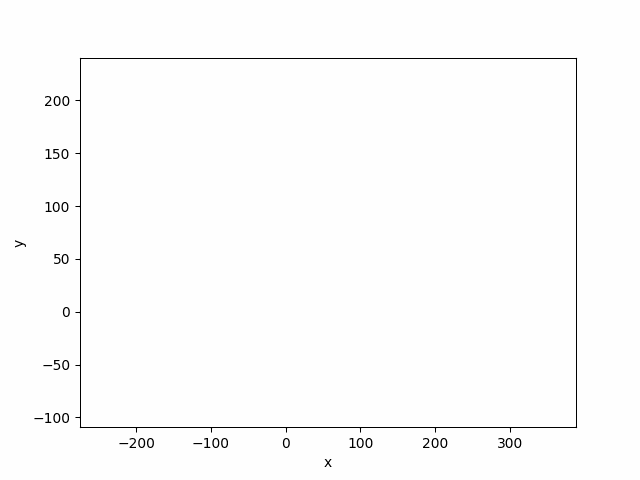

In [16]:
# triangulacja Delaunay z wizualizacją krokową
# czerwony punkt - obecnie dodany do rozważania punkt
# brązowe krawedzie - obecnie przeszukiwany trójkąt
# niebieskie krawędzie - sąsiedztwo trójkąta zawierającego punkt
# żółte krawędzie - otoczka sąsiedztwa
# czarne krawędzie - obecny stan triangulacji

delaunay = DelaunayTriangulation(points)
_, vis = delaunay.run_with_visualisation()
vis.show_gif(interval=300)

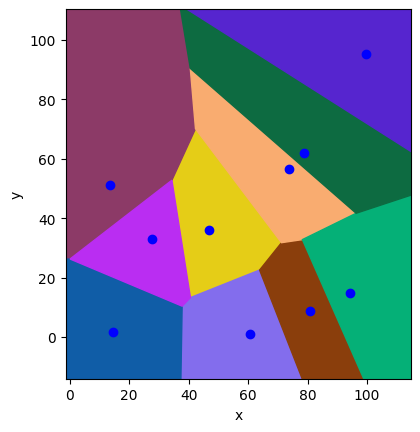

In [18]:
# diagram Woronoja
from matplotlib import pyplot as plt
import numpy as np

delaunay = DelaunayTriangulation(points)
delaunay.run(clean_up=False)
voronoi_diagram = VoronoiDiagram(points, delaunay.neighbours, delaunay.triangulation)
plygon_list = voronoi_diagram.create_diagram()
vis_diagram = Visualizer()

for polygon in plygon_list:
    vis_diagram.add_polygon(polygon.data, color=np.random.rand(3, ))

# find boundaries for diagram
min_x, max_x, min_y, max_y = voronoi_diagram.create_boundary_for_points()
vis_diagram.add_point([p.get() for p in points], color="blue")


vis_diagram.show()
plt.xlim(min_x - 15, max_x + 15)
plt.ylim(min_y - 15, max_y + 15)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

Diagram Woronoja wyznaczony za pomocą algorytmu Fortune'a

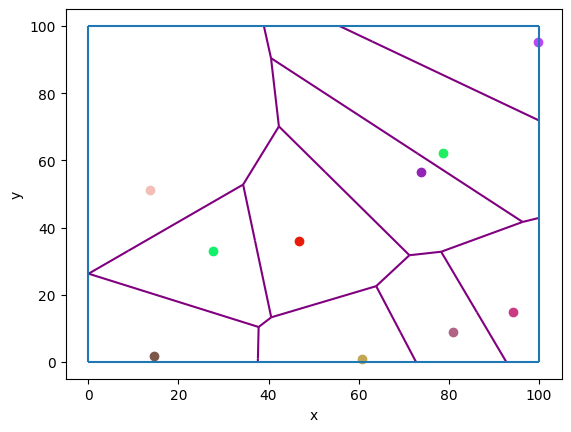

In [19]:
fortune = FortuneAlgorithm(points)
fortune.visualize()